#stochastic gradient descent(with dataset)

In [2]:
#stochastic gradient descent
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

data = pd.read_csv("/content/unioncarbide.csv")
print(data.head())

     X    Y
0  7.6  157
1  7.1  174
2  8.2  175
3  7.5  188
4  7.4  171


In [3]:
#OUTLINERS

out = np.abs(stats.zscore(data))
print(out)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


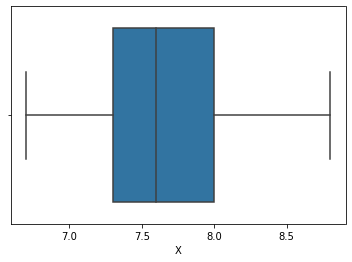

In [4]:
sns.boxplot(x=data['X'])


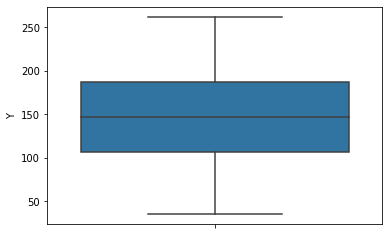

In [5]:
sns.boxplot(y=data['Y'])

In [6]:
data1 = data[(out<3).all(axis=1)]
print(data1.head())

     X    Y
0  7.6  157
1  7.1  174
2  8.2  175
3  7.5  188
4  7.4  171


In [7]:
df = data
for i in df:
  q = df[i].quantile(0.99)
  df[df[i]<q]
  q_low = df[i].quantile(0.01)
  q_hi  = df[i].quantile(0.99)
  df_filtered = df[(df[i]<q_hi) & (df[i]>q_low)]

data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
  print('No outliners')
else:
  print('There are outliners')

32
32
No outliners


In [8]:
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [9]:
#normalization

data1 = data
data1 = (data1-data1.min())/(data1.max()-data1.min())
print(data1.head())

          X         Y
0  0.428571  0.644970
1  0.190476  0.745562
2  0.714286  0.751479
3  0.380952  0.828402
4  0.333333  0.727811


In [10]:
#split data
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data1,test_size=0.1)

In [11]:
xa = np.array(train_data['X'])
ya = np.array(train_data['Y'])

In [12]:


from sympy import *
import pandas as pd
import random
from math import *


#step1
m0=random.randint(-9,9)
c0=random.randint(-9,9)
epoches=124
learnrate=0.1
iter=0


#step2
x=Symbol('x')
y=Symbol('y')
m=Symbol('m')
c=Symbol('c')
e=(0.5)*(y-(m*x)-c)**2

e1=e.diff(m)
e2=e.diff(c)

#training..


for iter in range(epoches):
  for i in range(0,len(xa)):
    
    dm=e1.subs([(m,m0),(c,c0),(x,xa[i]),(y,ya[i])])
    dc=e2.subs([(m,m0),(c,c0),(x,xa[i]),(y,ya[i])])

    cm = (-1.0)*(learnrate)*dm
    cc = (-1.0)*(learnrate)*dc

    m0 = m0+cm
    m0 = m0.round(3)
    c0 = c0+cc
    c0 = c0.round(3)

      



print(m0,c0)



-0.447 0.822


In [17]:
#RSME on training data

from sklearn.metrics import mean_squared_error
tr_predicted =  m0 * train_data['X'] + c0

e1 = mean_squared_error(predicted, train_data['Y'])
print("Mean Square Error is:", e1)

Mean Square Error is: 0.08244203034286454


In [18]:
#testing...
t_predicted = m0 * test_data['X'] + c0
e2 = mean_squared_error(t_predicted, test_data['Y'])
print("Mean Square Error:",e2)

Mean Square Error: 0.09162096134704668


In [19]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()

In [24]:
#estimating the output......

x=float(input("Enter pH value of well water: "))
x1=x
x=(x - x_min)/(x_max - x_min)
y=m0 * x + c0
y=y*(y_max - y_min) + y_min
print(f"Estimated bicarbonates of well water based on its pH {x1} is : {y}")

Enter pH value of well water: 8.1
Estimated bicarbonates of well water based on its pH 8.1 is : 136.557210286458
